# check downloaded images by make_url_file.py

In [68]:
coco = COCO('./raw/annotations/modanet2018_instances_train.json')

loading annotations into memory...
Done (t=9.85s)
creating index...
index created!


In [67]:
from PIL import Image
from pycocotools.coco import COCO

json_file = os.path.join(
    os.environ['DATASET_ROOT'],
    'tiny/labels/modanet_snaps.json'
)
df = pd.read_json(json_file)
it = df.iterrows()

ctg_csv_file = './tiny/labels/master_category.csv'
df_ctg = pd.read_csv(ctg_csv_file).set_index('category_id')
df_ctg

,category
category_id,
1,bag
2,belt
3,boots
4,footwear
5,coat/jacket/suit/blazers/cardigan/sweater/Jumpsuits/Rompers/vest
6,dress/t-shir dress
7,sunglasses
8,pants/jeans/leggings
9,top/blouse/t-shirt/shirt


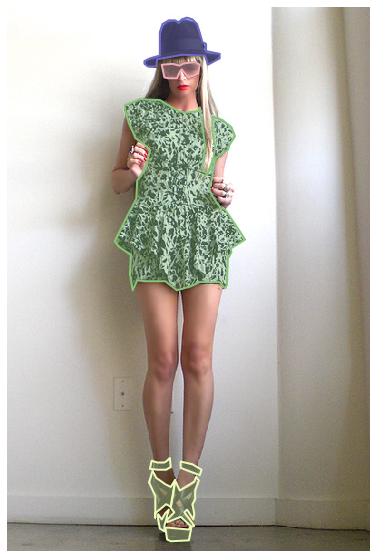

In [71]:
i, row = next(it)
img_name = row['file_name']
img_file = os.path.join(
    os.environ['DATASET_ROOT'],
    'tiny/images',
    img_name
)
img_id = row['image_id']

I = Image.open(img_file)

_ = plt.imshow(I)
_ = plt.axis('off')

annIds = coco.getAnnIds(imgIds=img_id, catIds=df_ctg.index, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)